In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# load the data

In [2]:
PATH = r'./data.csv'

dataset = pd.read_csv(PATH,sep=',')
columns = dataset.columns.tolist() # get the columns

batch_audio = pd.DataFrame(dataset).to_numpy()

features = batch_audio[:, 1:]
y = batch_audio[:, 0]

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=0)

In [3]:
X_train

array([[3.81133584e+02, 4.44742455e+02, 1.26851601e+03, ...,
        2.64629560e+01, 4.52240700e+00, 2.64597430e+01],
       [9.91693310e+02, 1.23109352e+03, 1.93688832e+03, ...,
        1.89466190e+01, 9.51992900e+00, 1.84271350e+01],
       [1.02245936e+03, 9.26565399e+02, 2.66562334e+03, ...,
        7.60869190e+01, 3.40885340e+01, 7.92708060e+01],
       ...,
       [6.13580888e+02, 5.08503609e+02, 2.59991659e+03, ...,
        4.24128900e+00, 1.49940600e+00, 4.29004700e+00],
       [2.24470494e+02, 1.33723265e+02, 5.90363170e+02, ...,
        3.68739400e+00, 2.64584700e+00, 3.78649000e+00],
       [1.11561056e+02, 1.70451388e+02, 5.02403672e+02, ...,
        4.78451200e+00, 1.01278000e+00, 4.91370800e+00]])

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(799, 514)
(799,)
(200, 514)


# linear smv

In [8]:
X=np.linspace(0,10,20)
Y= []
for i in X : 
    model = LinearSVC(C=np.exp(i/7), max_iter=100, tol=1e-4)
    model.fit(X_train, y_train)
    Y.append(model.score(X_test, y_test))

C:\Users\59605\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\59605\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\59605\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\59605\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\59605\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to con

Text(0.5, 1.0, 'relation entre C et precision')

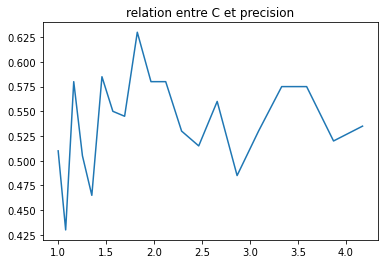

In [9]:
plt.plot(np.exp(X/7),Y)
plt.title("relation entre C et precision")

In [10]:
## Save W and b
model = LinearSVC(C=1.4, max_iter=100, tol=1e-4) 

# On peut modifier les paramètres C, max_iter et tol, pour augmenter la performance du modèle.

model.fit(X_train, y_train)

print("Performances du modèle sur la base de données de test : ", model.score(X_test, y_test))

b = model.intercept_
w = model.coef_

np.savetxt("w.csv", w, fmt='%.4f',delimiter=",")
np.savetxt("b.csv", b, fmt='%.4f',delimiter=",")

Performances du modèle sur la base de données de test :  0.62


C:\Users\59605\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# tester SVM avec autres parametres

In [11]:
# Define the parameters and values to be tested
parameters = {'kernel':('linear', 'rbf',"poly","sigmoid"), 
              'C':[0.1, 0.5,1,5, 10,20,30]}

# Initialize a SVM classifier
svc = svm.SVC()

# Initialize the cross-validation
clf = GridSearchCV(svc, parameters)

# Now, run cross-validation on the TRAINING set
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 20, 30],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

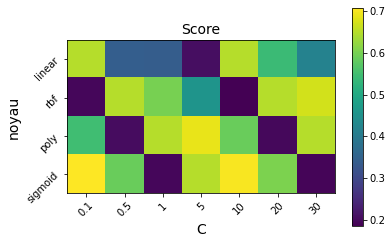

In [12]:
plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')
plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()

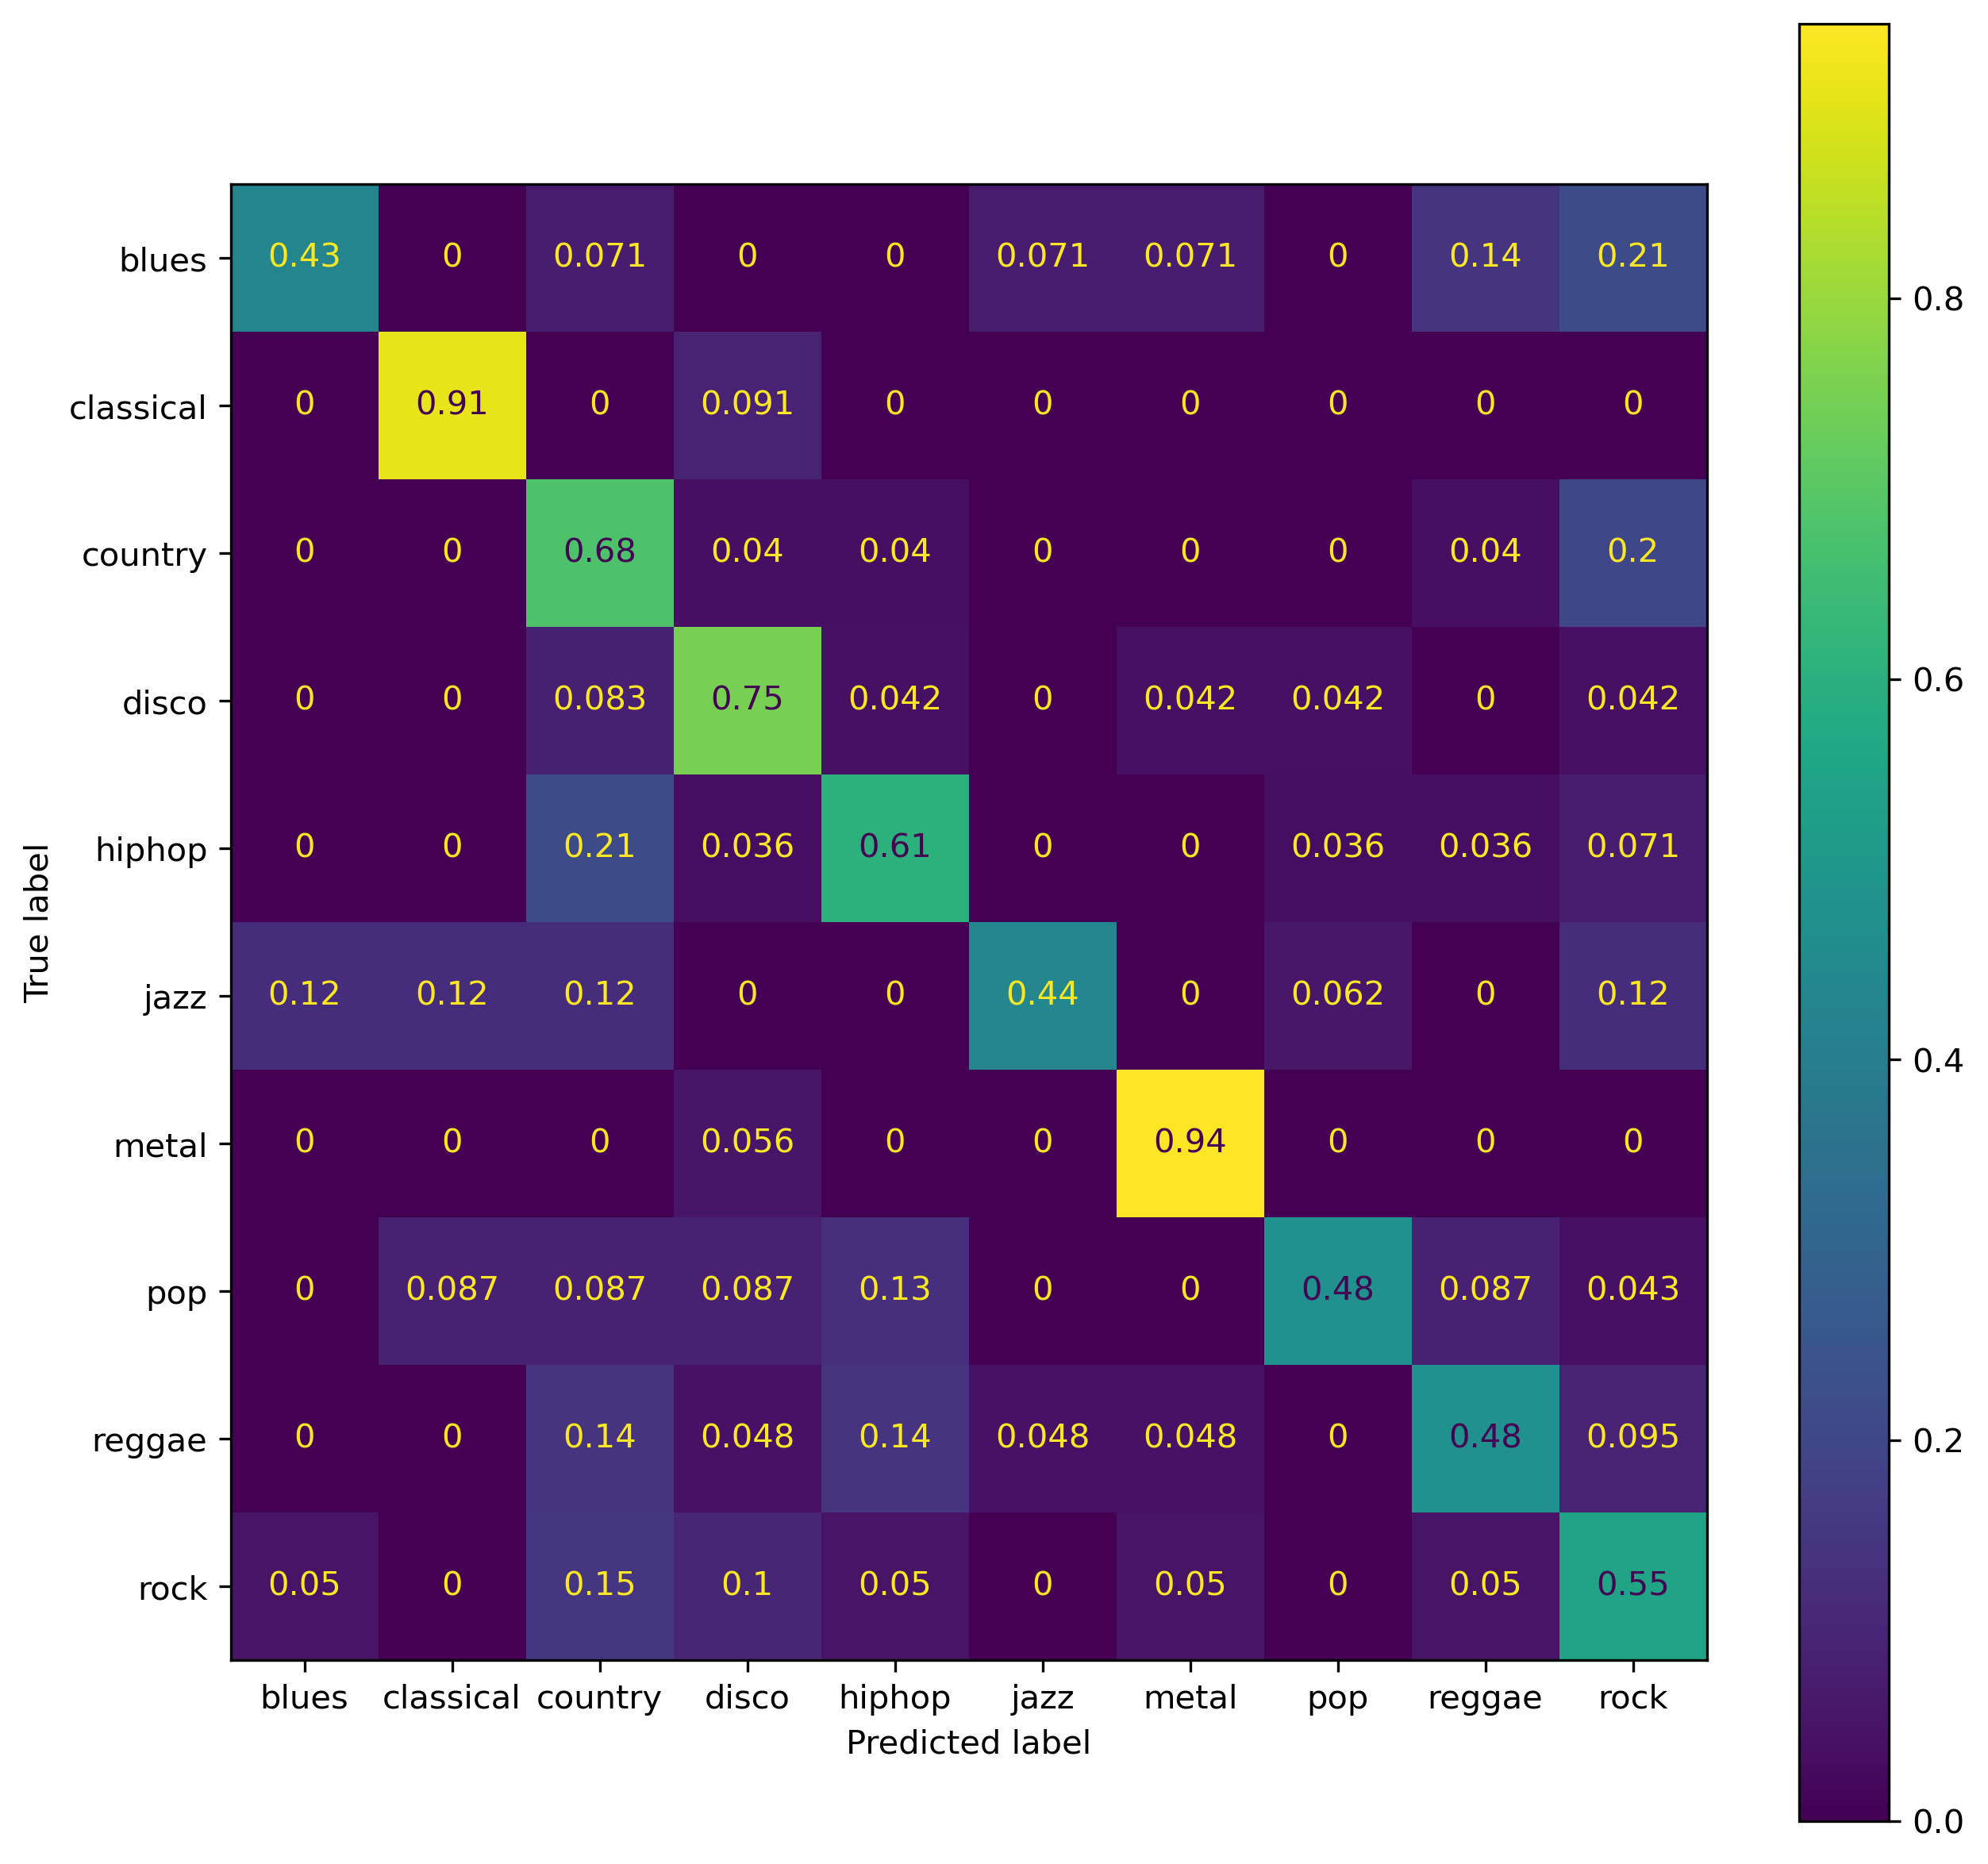

In [13]:
## Plot Confusion Matrix

labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
plot_confusion_matrix(model, X_test, y_test, ax=ax, normalize='true', display_labels=labels)
plt.savefig('confusion.png',transparent=False, facecolor='white' )

# la methode de normalization 

In [14]:
## Technique pour obtenir une nette amélioration des performances : normaliser les entrées du classifieur avec la batch normalization (Xi - mean / (std + epsilon)) 

def normalize(X):
    '''
    Batch normalization
    '''
    X_normalized = np.zeros((X.shape))
    for j in range(X.shape[1]):
        mean = np.mean(X[:, j])
        std = np.std(X[:, j])
        for i in range(X.shape[0]):
            X_normalized[i, j] = (X[i, j] - mean) / (std + 0.000001)
    return X_normalized

In [15]:
X_train = normalize(X_train)
X_test = normalize(X_test)
model = LinearSVC(C=1.3, max_iter=100, tol=1e-4) 
model.fit(X_train, y_train)
print("Performances du modèle sur la base de données de test : ", model.score(X_test, y_test))

Performances du modèle sur la base de données de test :  0.61


C:\Users\59605\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## la normalization ameliore linearSVM pour 10%

## RandomForest

In [32]:
dataset = pd.read_csv(PATH,sep=',')
columns = dataset.columns.tolist() # get the columns

batch_audio = pd.DataFrame(dataset).to_numpy()

features = batch_audio[:, 1:]
y = batch_audio[:, 0]

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=0)

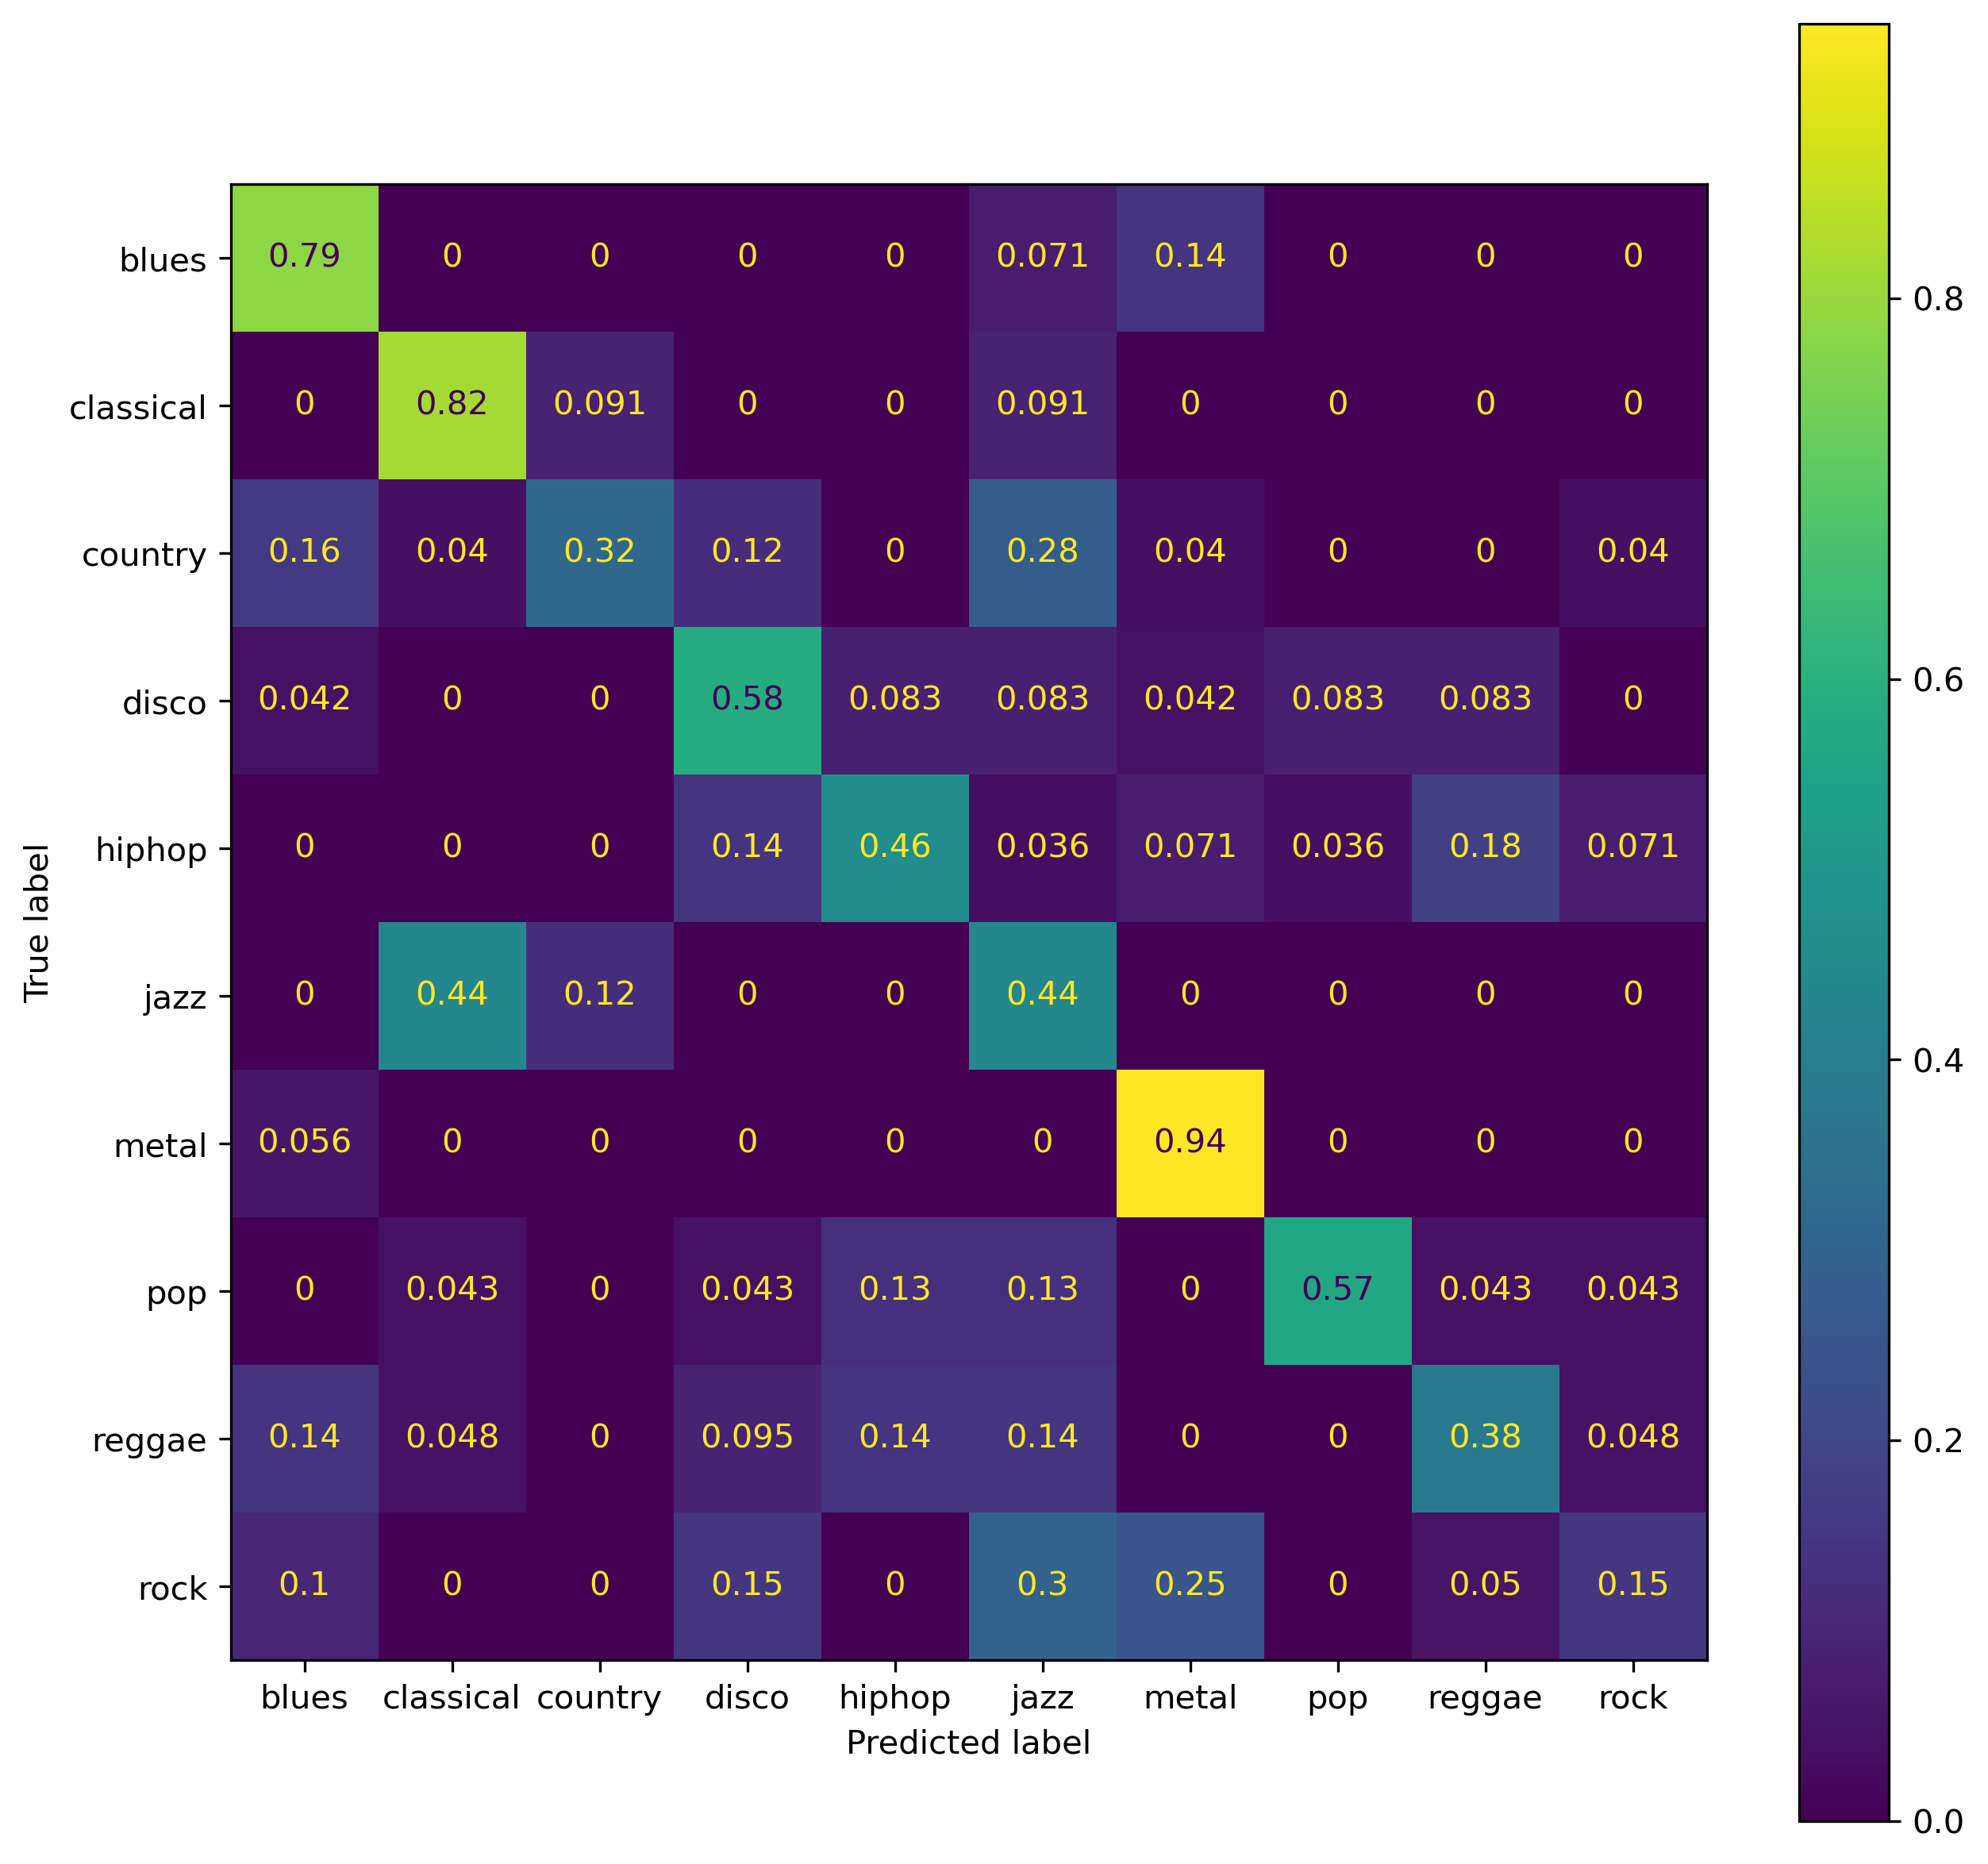

In [46]:
model = RandomForestClassifier(n_estimators= 600,
    criterion='gini',
    max_depth= 400,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=None,
    random_state=1024,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,)
model.fit(X_train, y_train)
print("Performances du modèle sur la base de données de test : ", model.score(X_test, y_test))

Performances du modèle sur la base de données de test :  0.705


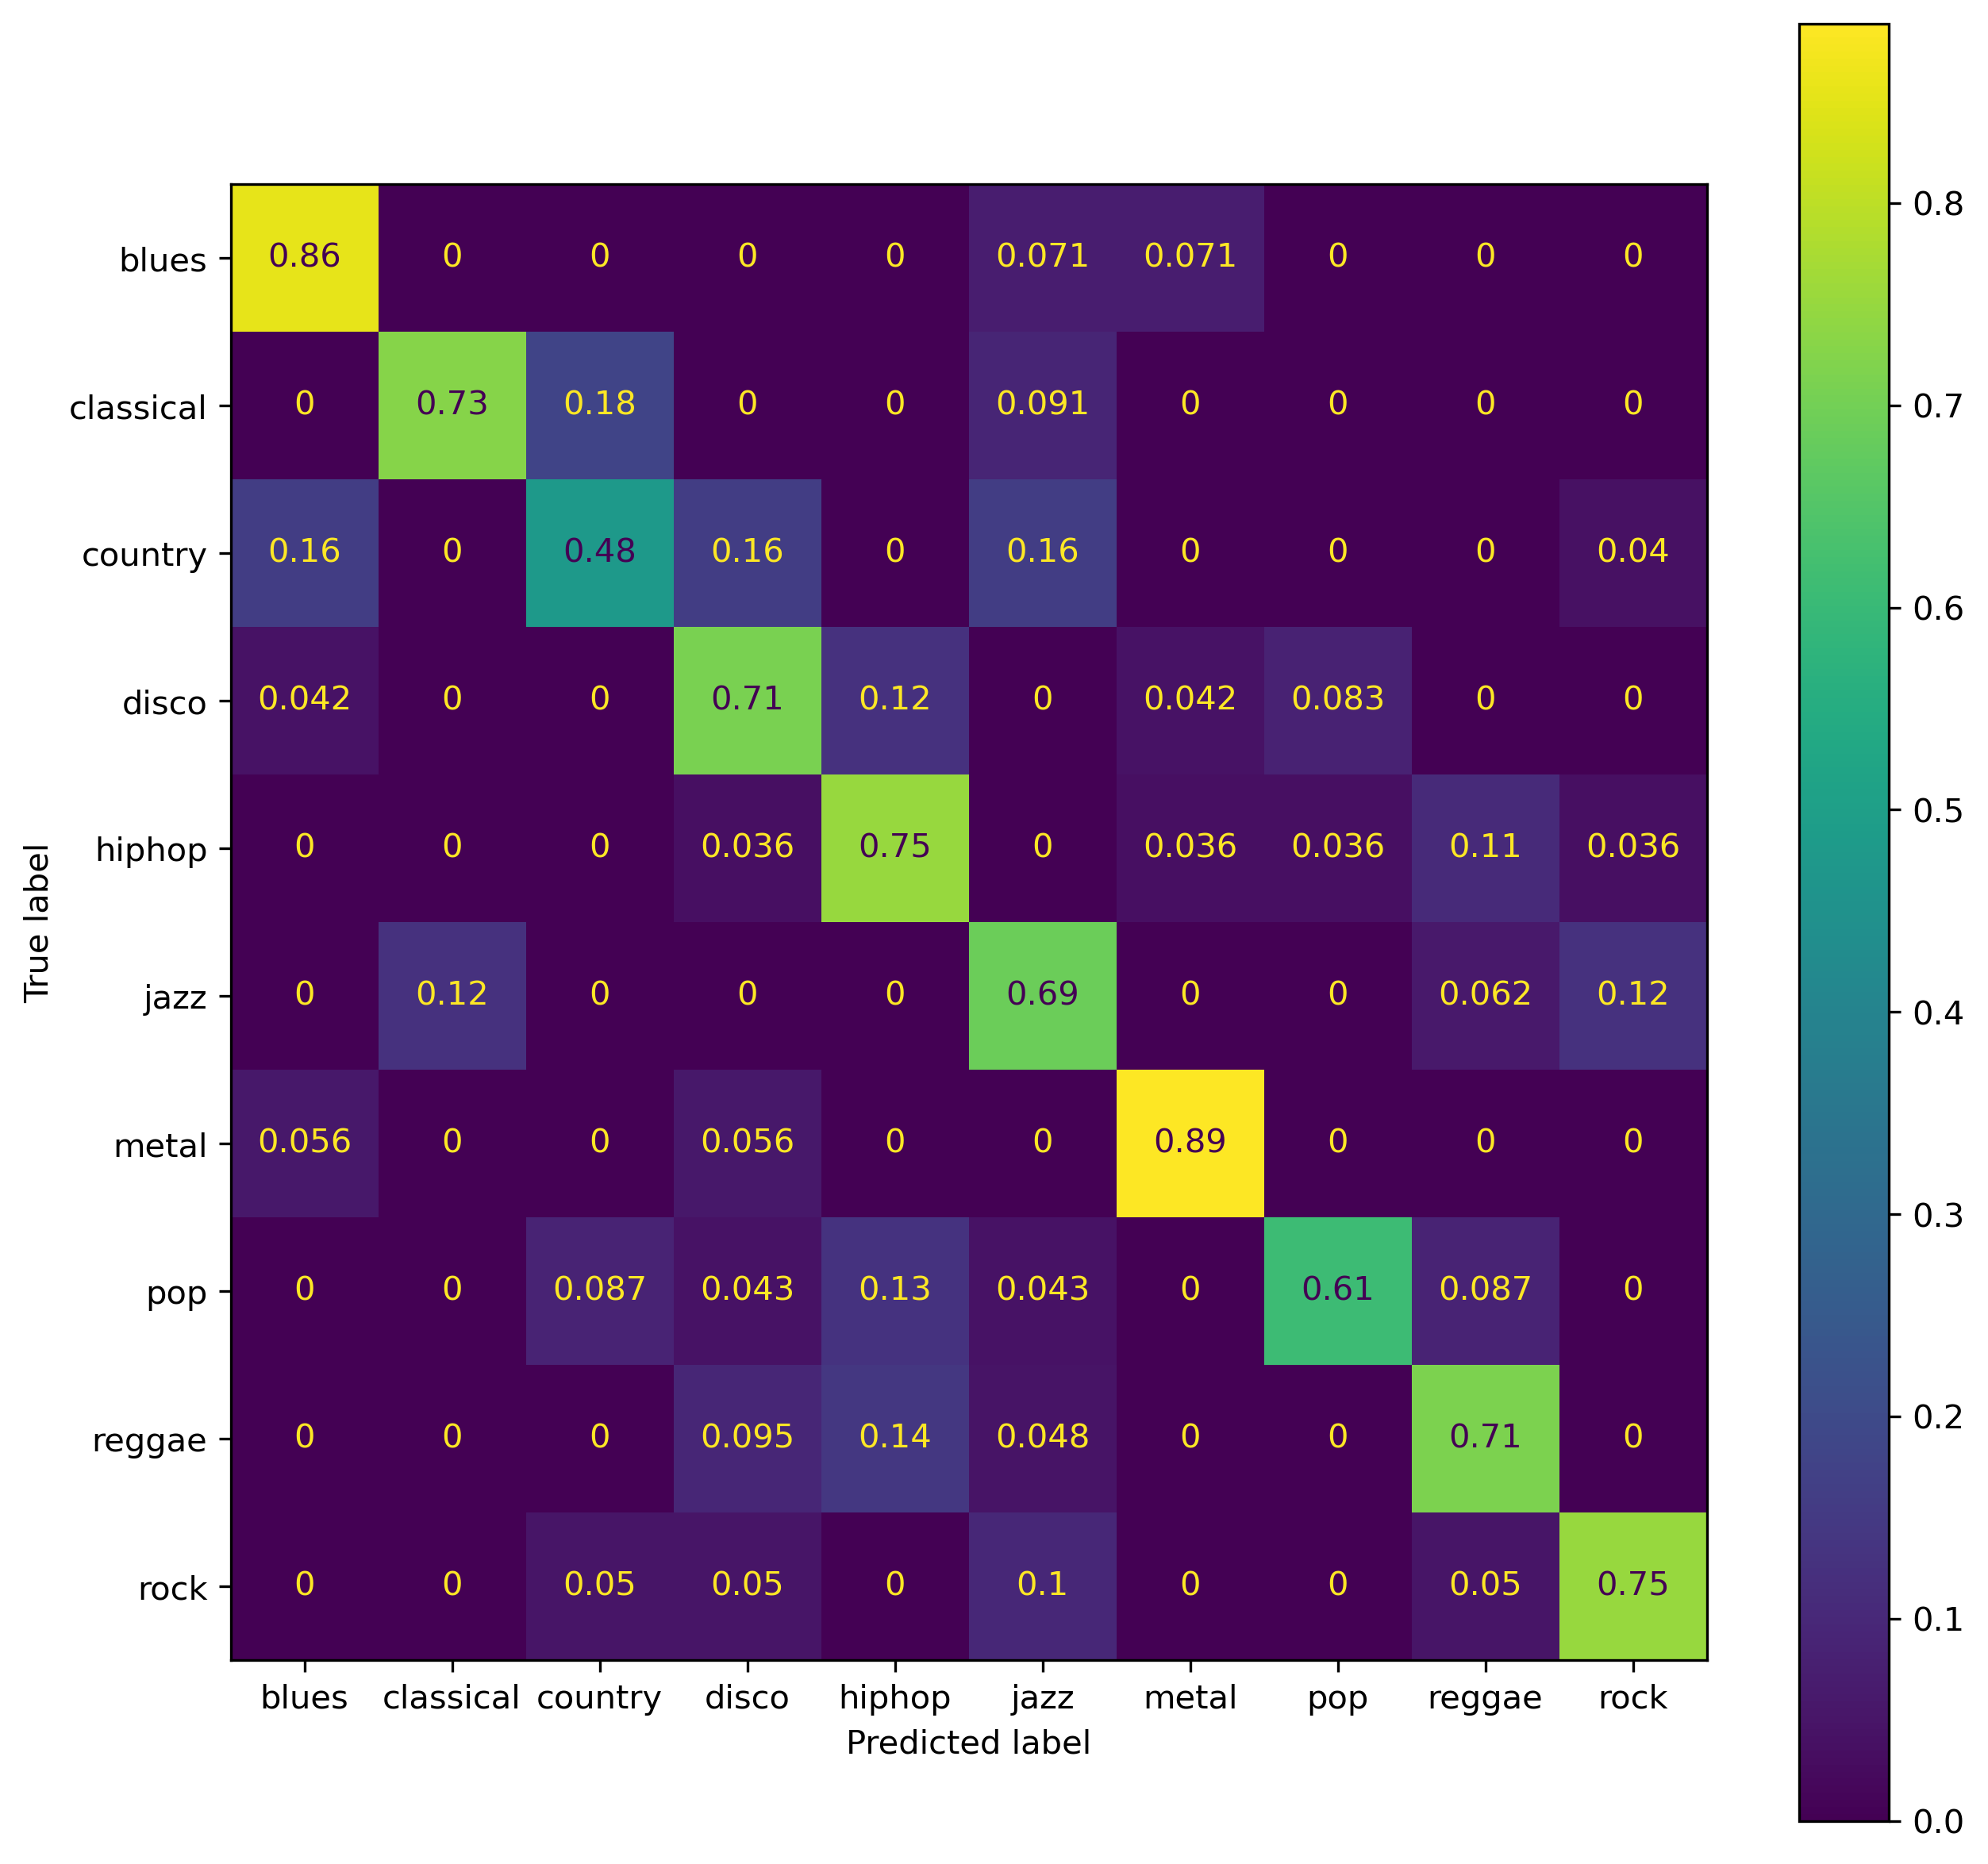

In [47]:
## Plot Confusion Matrix

labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
plot_confusion_matrix(model, X_test, y_test, ax=ax, normalize='true', display_labels=labels)
plt.savefig('confusion.png',transparent=False, facecolor='white' )

## Kneighbors

In [48]:
model = KNeighborsClassifier(p=1 , n_neighbors = 10 )
model.fit(X_train, y_train)
print("Performances du modèle sur la base de données de test : ", model.score(X_test, y_test))

Performances du modèle sur la base de données de test :  0.54
